In [63]:
import numpy as np
import json
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import os

In [38]:
with open('results/results/results_with_hmi.json') as f:
    results_with_hmi = json.load(f)
with open('results/results/results_without_hmi.json') as f:
    results_without_hmi = json.load(f)

In [79]:
def plot_roc(results, classifier_name, label):
    plt.gcf().set_size_inches((8,8))
    y_test = []
    y_score = []
    for result in results['roc'][classifier_name]:
        y_test.append(np.array(result['y_test']))
        y_score_tmp = np.array(result['y_score'])
        if y_score_tmp.shape[-1] == 1:
            y_score_tmp = y_score_tmp[...,0]
        y_score.append(y_score_tmp)
    y_test, y_score = map(np.array, (y_test, y_score))
    print y_test.shape, y_score.shape
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
    auc = roc_auc_score(y_test.ravel(), y_score.ravel(), average='weighted')
    plt.plot(fpr, tpr, label='{} {}: area {:.4}'.format(classifier_name, label, auc))
    return fpr, tpr, auc

(100, 75) (100, 75)
(100, 75) (100, 75)
(100, 75) (100, 75)
(100, 75) (100, 75)


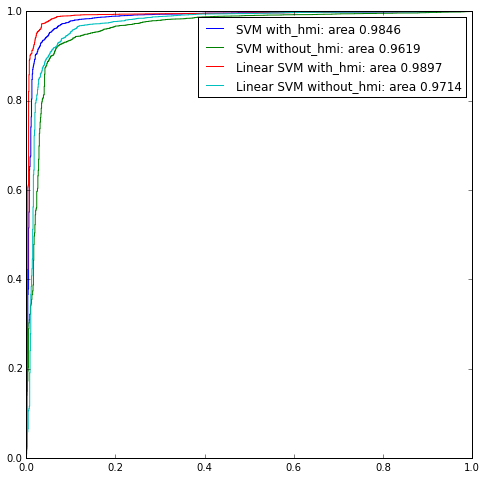

In [82]:
results = {}
for suffix in ['with_hmi', 'without_hmi']:
    with open('results/results/results_{}.json'.format(suffix)) as f:
        results[suffix] = json.load(f)
for classifier_name in ['SVM', 'Linear SVM']:
    for suffix in ['with_hmi', 'without_hmi']:
        fpr, tpr, auc = plot_roc(results[suffix], classifier_name, suffix)
        pd.DataFrame({'fpr': fpr, 'tpr': tpr}).to_csv('results/roc_{}_{}.csv'.format(classifier_name.replace(' ', '_'), suffix))
plt.legend(loc='best')
plt.savefig('results/roc_plot.pdf')
    

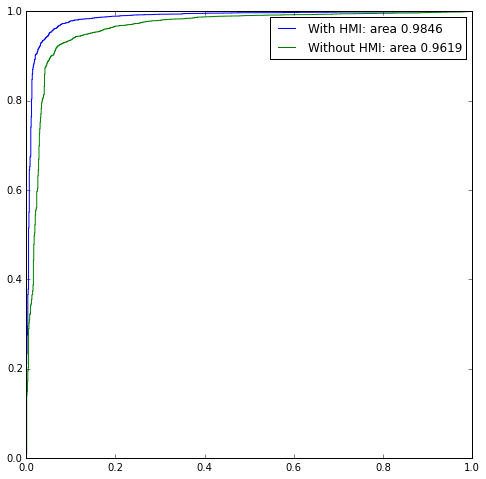

In [56]:
roc_with_hmi, roc_without_hmi = {}, {}
roc_with_hmi['fpr'], roc_with_hmi['tpr'], auc_with_hmi = plot_roc(results_with_hmi, 'With HMI')
roc_without_hmi['fpr'], roc_without_hmi['tpr'], auc_without_hmi = plot_roc(results_without_hmi, 'Without HMI')
plt.legend(loc='best')

In [59]:
df_with_hmi = pd.DataFrame(roc_with_hmi)
df_without_hmi = pd.DataFrame(roc_without_hmi)

In [62]:
print df_with_hmi.to_csv()

,fpr,tpr
0,0.0,0.00015873015873015873
1,0.0,0.00031746031746031746
2,0.0,0.0004761904761904762
3,0.0,0.0006349206349206349
4,0.0,0.0007936507936507937
5,0.0,0.0009523809523809524
6,0.0,0.0011111111111111111
7,0.0,0.0012698412698412698
8,0.0,0.0014285714285714286
9,0.0,0.0015873015873015873
10,0.0,0.001746031746031746
11,0.0,0.0019047619047619048
12,0.0,0.0020634920634920637
13,0.0,0.0022222222222222222
14,0.0,0.002380952380952381
15,0.0,0.0025396825396825397
16,0.0,0.0026984126984126986
17,0.0,0.002857142857142857
18,0.0,0.003015873015873016
19,0.0,0.0031746031746031746
20,0.0,0.0033333333333333335
21,0.0,0.003492063492063492
22,0.0,0.003650793650793651
23,0.0,0.0038095238095238095
24,0.0,0.003968253968253968
25,0.0,0.004126984126984127
26,0.0,0.004285714285714286
27,0.0,0.0044444444444444444
28,0.0,0.004603174603174603
29,0.0,0.004761904761904762
30,0.0,0.004920634920634921
31,0.0,0.005079365079365079
32,0.0,0.005238095238095238
33,0.0,0.005396825396825397
34,0.0,0.005555555555555556


In [64]:
'Linear SVM'.replace(' ', '_')

'Linear_SVM'